In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing data

<ipython-input-10-21583faf60ec>:5: RuntimeWarning: covariance is not positive-semidefinite.
  dist1 = np.random.multivariate_normal(mean1,cov1,250)
<ipython-input-10-21583faf60ec>:7: RuntimeWarning: covariance is not positive-semidefinite.
  dist3 = np.random.multivariate_normal(mean3,cov3,100)


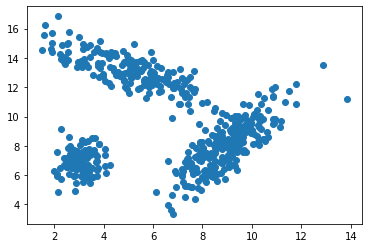

In [10]:
mean1, cov1 = [9,8],[[1.5,2],[1,2]]
mean2, cov2 = [5,13],[[2.5,-1.5],[-1.5,1.5]]
mean3, cov3 = [3,7],[[0.25,0.5],[-0.1,0.5]]

dist1 = np.random.multivariate_normal(mean1,cov1,250)
dist2 = np.random.multivariate_normal(mean2,cov2,180)
dist3 = np.random.multivariate_normal(mean3,cov3,100)

data=np.vstack([dist1,dist2,dist3])
plt.scatter(data[:,0],data[:,1])
plt.show()

## K-means algo

In [84]:
# k and max_iters are hyperparameters
def kmeans(X,k=3,max_iter=30):
    centroids_indexs = np.random.choice(range(0,X.shape[0]),3)
    centroids=X[centroids_indexs,:]

    for i in range(max_iter):
        class_labels=[]
        
        for x in X:
            distances=[]
            for c in centroids:
                d=np.dot(x-c,x-c)
                distances.append(d)
            cin=np.argmin(distances)
            class_labels.append(cin)
        class_labels=np.asarray(class_labels)
        
        centroid=[]
        for cin in range(k):
            c=X[class_labels==cin].mean(axis=0)
            centroid.append(c)
    
    return np.asarray(centroids), class_labels 
            

In [85]:
# prediction since it is kind of like parameter based model
def predict(X,x):
    centroids,cls_labels=kmeans(data)
    distances=[]
    for c in centroids:
        d=np.dot(x-c,x-c)
        distances.append(d)
    cin=np.argmin(distances)
    plt.scatter(data[:,0],data[:,1],c=cls_labels)
    plt.show()
    return cin

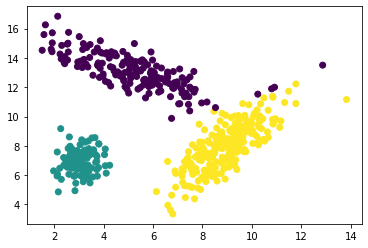

0

In [101]:
predict(data,[ 13.86509748, 14.40061208])
# yellow =2
# blue=1
# purple=0